## IMPORT NECESSARY LIBRARIES

In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Walmart DataSet.csv")
data.set_index('Date', inplace=True)
data


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 05-02-2010 to 26-10-2012
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2+ KB


In [4]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## CHECKING FOR OUTLIERS

In [5]:
column_list=data.columns

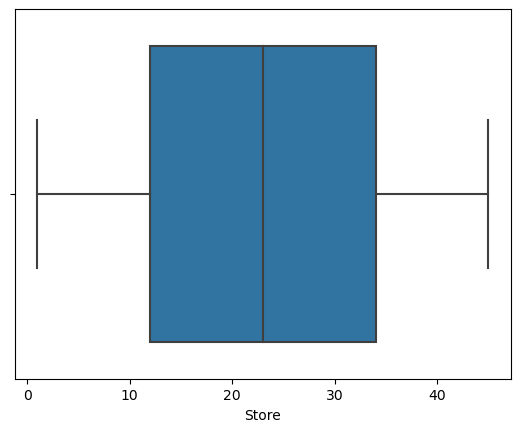

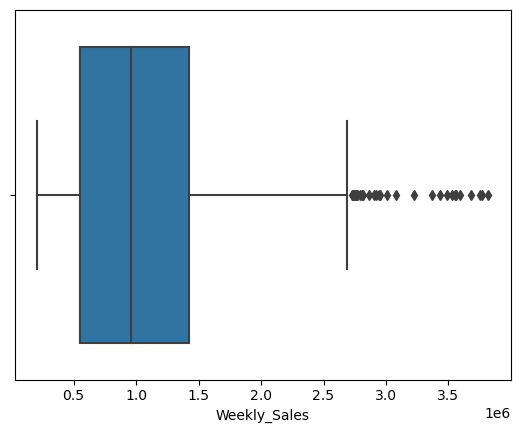

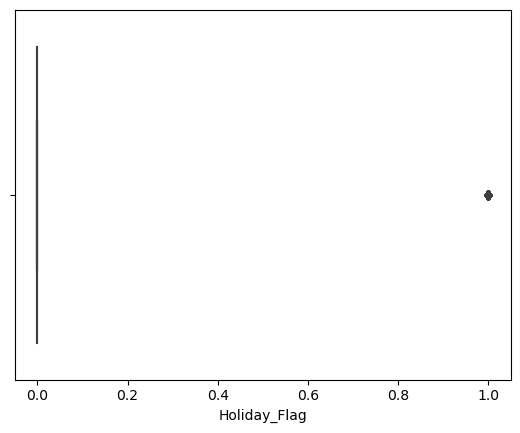

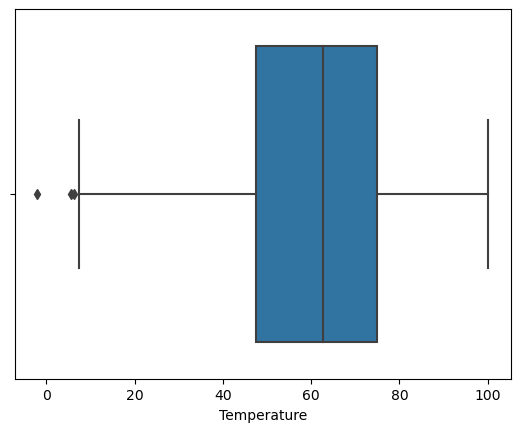

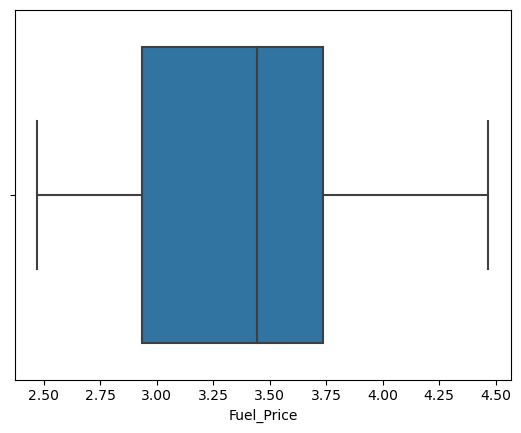

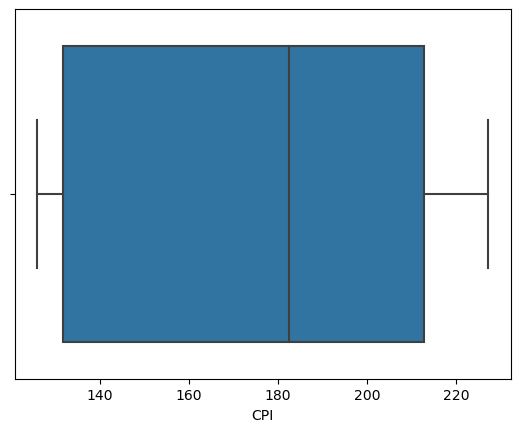

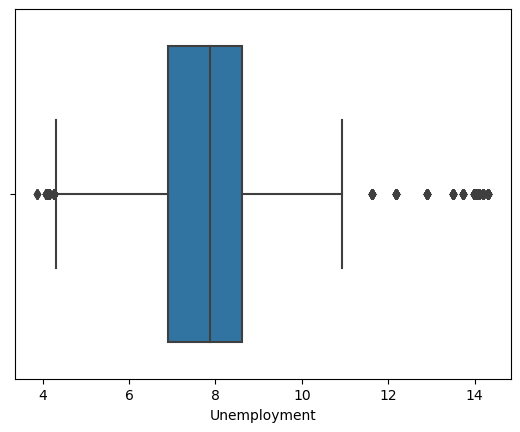

In [6]:
for i in column_list:
    if data.dtypes[i]=='int64' or data.dtypes[i]=='float64':
        sns.boxplot(x=data[i])
        plt.show()

#### From the above boxplots,it's clear that Weekly_Sales and Unemploment have outliers.

In [7]:
data['Store'].nunique()

45

#### There are about 45 different stores in this dataset. Lets select the any store id from 1-45

In [8]:
a=int(input("Enter the store id: "))
store=data[data.Store==a]
sales=pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales

Enter the store id: 5


,Weekly_Sales
Date,
01-04-2011,314316.55
01-06-2012,359867.80
01-07-2011,327093.89
01-10-2010,283178.12
02-03-2012,359206.21
...,...
30-07-2010,268929.03
30-09-2011,292315.38
30-12-2011,349624.88


In [9]:
sales.dtypes

Weekly_Sales    float64
dtype: object

In [10]:
#remove date from index to change its dtype because it clearly isnt acceptable.
sales.reset_index(inplace=True)
#converting 'date' column to a datetime type
sales['Date']=pd.to_datetime(sales['Date'])
# resetting date back to the index
sales.set_index('Date',inplace=True)

C:\Users\Mahima\AppData\Local\Temp\ipykernel_7740\842669314.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales['Date']=pd.to_datetime(sales['Date'])


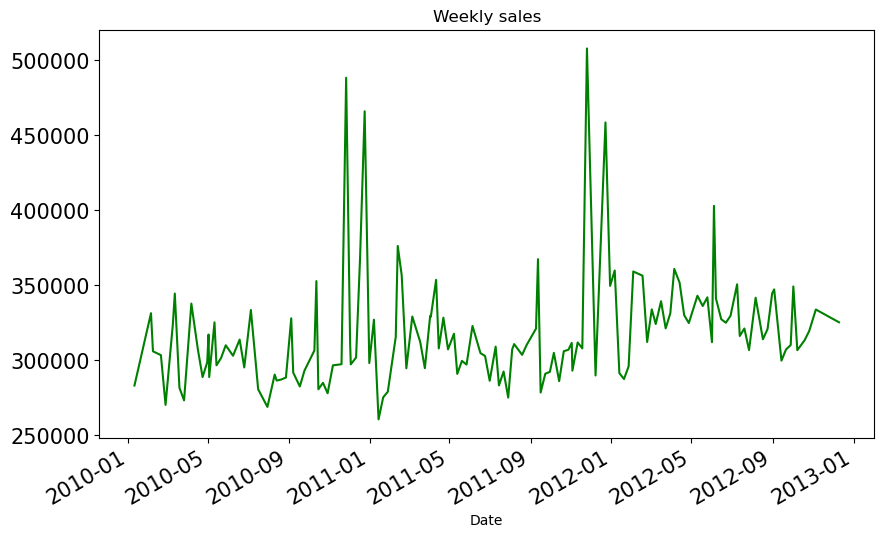

In [11]:
sales.Weekly_Sales.plot(figsize=(10,6),title='Weekly sales',color='green',fontsize=15)
plt.show()

<Figure size 640x480 with 0 Axes>

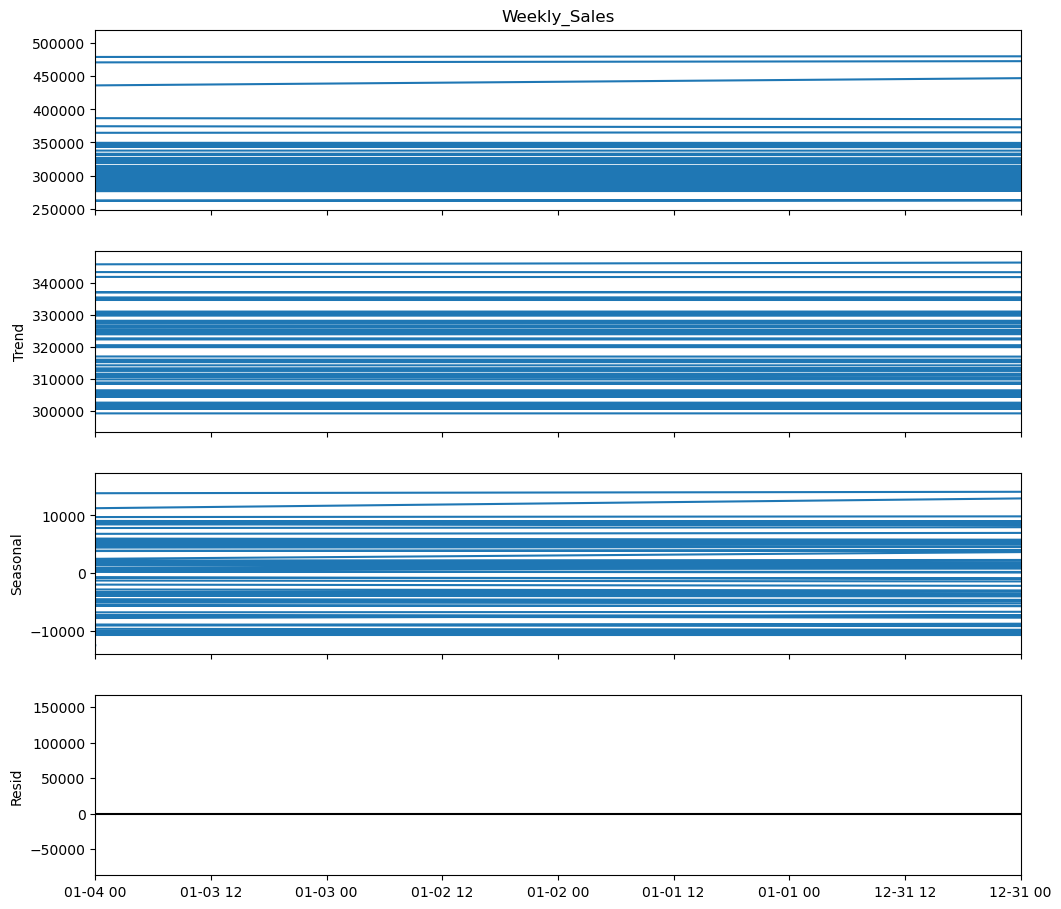

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(sales.Weekly_Sales,period=12)
fig=plt.figure()
fig=decomposition.plot()
fig.set_size_inches(12,10)
plt.show()

In [15]:
#lets compare the 2012 data of two stores
# Lets take store 5 data for analysis
store10 = data[data.Store == 10]
# there are about 45 different stores in this dataset.

sales10 = pd.DataFrame(store10.Weekly_Sales.groupby(store10.index).sum())
sales10.dtypes
# Grouped weekly sales by store 10

#remove date from index to change its dtype because it clearly isnt acceptable.
sales10.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales10['Date'] = pd.to_datetime(sales10['Date'])
# resetting date back to the index
sales10.set_index('Date',inplace = True)

C:\Users\Mahima\AppData\Local\Temp\ipykernel_7740\2671817483.py:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales10['Date'] = pd.to_datetime(sales10['Date'])


In [17]:
y1=sales.Weekly_Sales
y2=sales10.Weekly_Sales

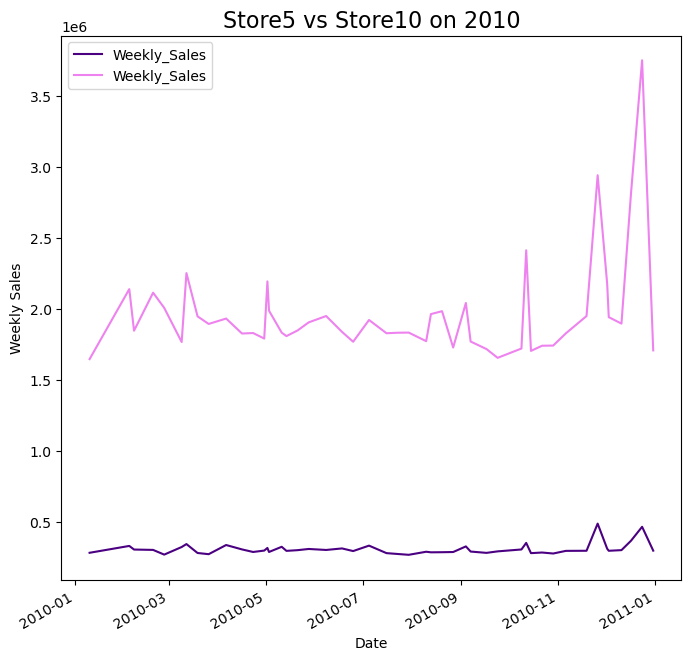

In [28]:
y1['2010'].plot(figsize=(8,8),legend=True,color='indigo')
y2['2010'].plot(figsize=(8,8),legend=True,color='violet')
plt.ylabel("Weekly Sales")
plt.title("Store5 vs Store10 on 2010",fontsize=16)
plt.show()

#### Clearly we can see the irregularities 

In [29]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [30]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\Mahima\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahima\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahima\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahima\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahima\anaconda3\Lib\

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2694      0.344     -3.692      0.000      -1.943      -0.596
ar.L2         -1.2378      0.401     -3.088      0.002      -2.023      -0.452
ar.L3         -0.8335      0.334     -2.499      0.012      -1.487      -0.180
ar.L4         -0.5653      0.153     -3.706      0.000      -0.864      -0.266
ma.L1         -1.8754      0.458     -4.091      0.000      -2.774      -0.977
ma.L2          0.8019      0.878      0.913      0.361      -0.919       2.522
ma.L3          0.0790      0.472      0.167      0.867      -0.846       1.004
ar.S.L52      -0.2298      0.129     -1.781      0.075      -0.483       0.023
sigma2      7.349e+09   1.35e-10   5.45e+19      0.000    7.35e+09    7.35e+09


C:\Users\Mahima\AppData\Local\Temp\ipykernel_7740\3809637464.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


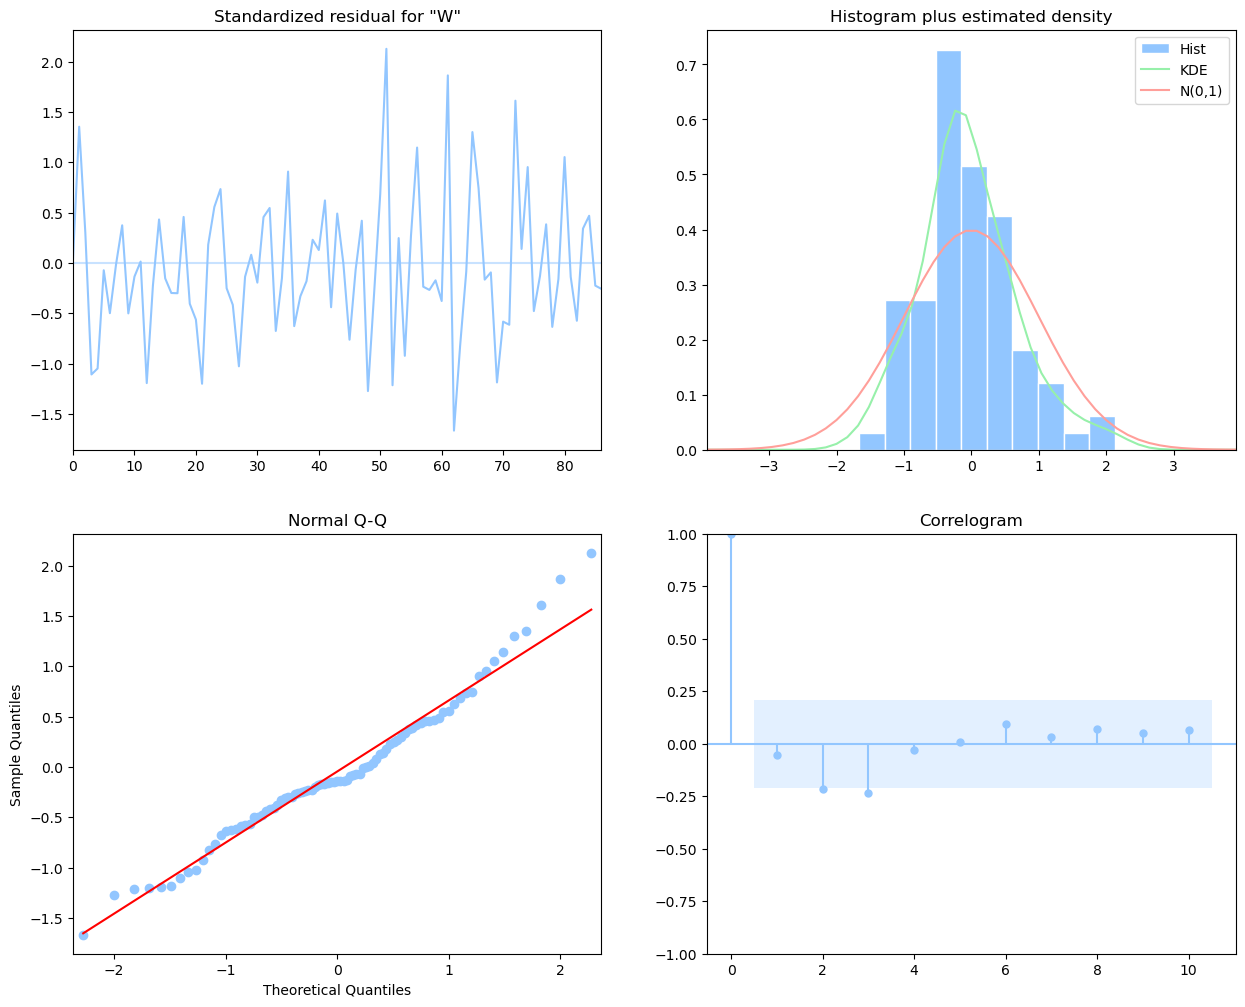

In [31]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

C:\Users\Mahima\AppData\Local\Temp\ipykernel_7740\2689329424.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed')


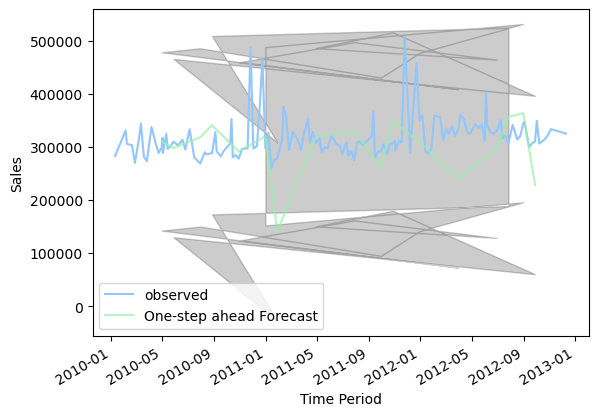

In [33]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [34]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3187601497.69


In [35]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\Users\Mahima\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


C:\Users\Mahima\AppData\Local\Temp\ipykernel_7740\4126824999.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed', figsize=(12, 8))


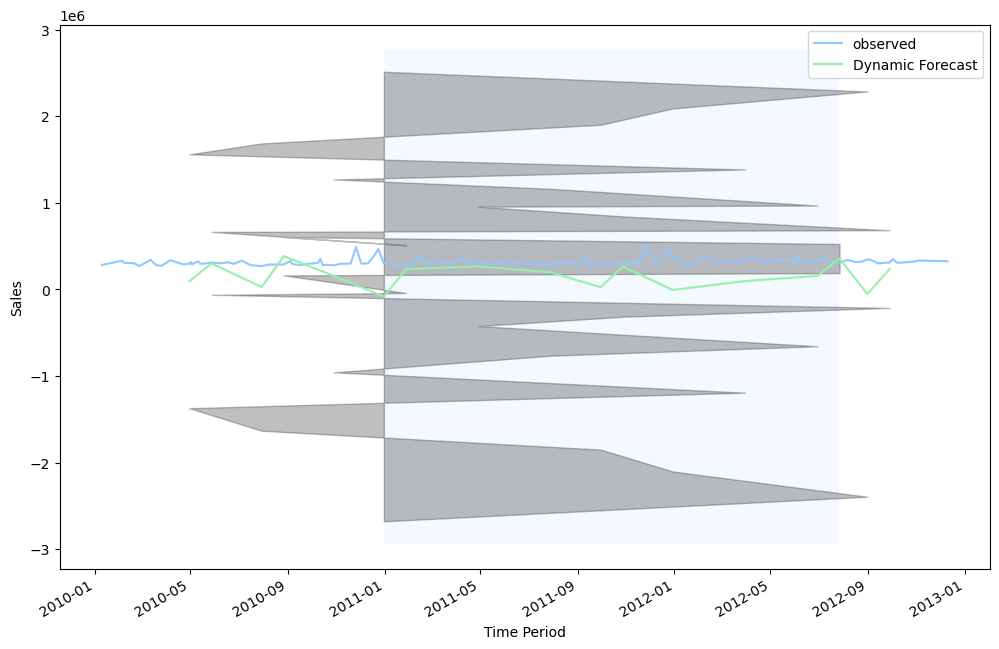

In [36]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()


In [37]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    356904.000335
2010-08-27    384136.433721
2011-01-28    234932.012906
2010-05-28    301551.680688
2012-09-28    235239.765898
2011-10-28    264150.186109
2011-04-29    266356.756754
2012-06-29    156481.434653
2011-07-29    198538.291990
2010-10-29    156566.881796
2012-03-30     96879.991985
2010-04-30     94203.803997
2010-07-30     27344.062773
2011-09-30     26066.667112
2011-12-30     -6050.527985
2012-08-31    -53614.205270
2010-12-31    -81850.527796
Name: predicted_mean, dtype: float64


In [38]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-08-06    341704.59
2012-09-03    347295.60
2012-10-02    349239.88
2012-10-08    306759.70
2012-11-05    333870.52
2012-12-10    325345.41
2012-09-14    299800.67
2012-08-17    314014.18
2012-10-19    313358.15
2012-09-21    307306.76
2012-08-24    320831.36
2012-10-26    319550.77
2012-07-27    306827.36
2012-09-28    310141.68
2012-08-31    344642.01
Name: Weekly_Sales, dtype: float64


In [39]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 235744.2


In [40]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 523234.769706855


In [41]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

C:\Users\Mahima\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Mahima\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [42]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

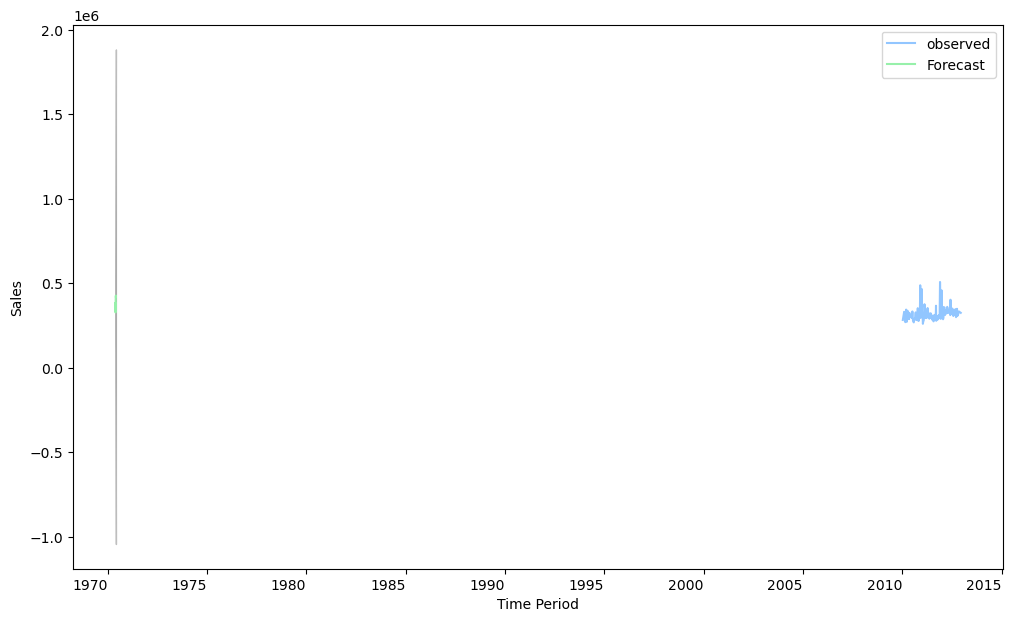

In [43]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()